**Implementing the Black and Scholes Model**

1) Import Statements:

    math: This standard library provides access to mathematical functions.
    numpy: A fundamental package for scientific computing with Python.
    scipy.stats.norm: Provides the normal cumulative distribution function which is needed for calculating the Black-Scholes option price.

2) User Input Function: def get_user_input():
> This function prompts the user to input the necessary parameters for the Black-Scholes model, including the current stock price (S), strike price (X), time to maturity (T), volatility (sigma), and risk-free interest rate (r). It includes validation to ensure that all inputs are non-negative numbers.

3) Black-Scholes Function: def black_scholes_call_put(S, X, T, sigma, r):
> This function computes the price of European call and put options based on the Black-Scholes formula. It uses the inputs provided by the user (or another function) to calculate two critical values (d1 and d2) and then uses the cumulative distribution function to determine the option prices.

4) Main Script Logic:
> This part of the script captures the user inputs and then invokes the black_scholes_call_put function with those inputs. It uses tuple unpacking to pass the inputs into the function.








In [ ]:
import math
import numpy as np
from scipy.stats import norm

def get_user_input():
    # Retrieves user input for parameters and ensures they are valid numbers and non-negative for S and T.
    while True:
        try:
            S = float(input("Enter the current stock price (Spot Price): "))
            if S < 0:
                print("Invalid input: Spot Price cannot be negative. Please re-enter.")
                continue

            X = float(input("Enter the strike price (Strike Price): "))
            if X < 0:
                print("Invalid input: Strike Price cannot be negative. Please re-enter.")
                continue

            T = float(input("Enter the time to maturity (in years, Time to Maturity): "))
            if T < 0:
                print("Invalid input: Time to Maturity cannot be negative. Please re-enter.")
                continue

            sigma = float(input("Enter the volatility (Volatility, as a decimal): "))
            if sigma < 0:
                print("Invalid input: Volatility cannot be negative. Please re-enter.")
                continue

            r = float(input("Enter the risk-free interest rate (Interest Rate, as a decimal): "))
            if r < 0:
                print("Invalid input: Risk-free interest rate cannot be negative. Please re-enter.")
                continue

            return S, X, T, sigma, r
        except ValueError:
            print("Invalid input, please enter numbers.")

def black_scholes_call_put(S, X, T, sigma, r):
    # Calculates the Black-Scholes model prices for European call and put options.
    d1 = (math.log(S / X) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)

    call_price = S * norm.cdf(d1) - X * math.exp(-r * T) * norm.cdf(d2)
    put_price = X * math.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return call_price, put_price

inputs = get_user_input()
call_price, put_price = black_scholes_call_put(*inputs)

print()
print(f"Call Option Price: {call_price:.2f}")
print(f"Put Option Price: {put_price:.2f}")

Enter the current stock price (Spot Price): -100
Invalid input: Spot Price cannot be negative. Please re-enter.
Enter the current stock price (Spot Price): 100
Enter the strike price (Strike Price): 120
Enter the time to maturity (in years, Time to Maturity): 5
Enter the volatility (Volatility, as a decimal): 0.09
Enter the risk-free interest rate (Interest Rate, as a decimal): 0.07

Call Option Price: 17.53
Put Option Price: 2.09


**Implementng Option Greeks by small changes in input parameters**



In [ ]:
def option_greeks_approx(S, X, T, r, sigma):
    base_call_price, base_put_price = black_scholes_call_put(S, X, T, sigma, r) # Calculate the base call and put prices

    dS = S * 0.01  # 1% of stock price
    dT = 1/365  # One day change for Theta
    dr = 0.0001  # 0.01% change for interest rate
    dsigma = 0.01  # 1% change for volatility

    # Delta Approximation
    call_delta = (black_scholes_call_put(S + dS, X, T, sigma, r)[0] - base_call_price) / dS
    put_delta = (black_scholes_call_put(S + dS, X, T, sigma, r)[1] - base_put_price) / dS

    # Gamma Approximation (requires a second order approximation)
    call_gamma = (black_scholes_call_put(S + dS, X, T, sigma, r)[0] - 2 * base_call_price + black_scholes_call_put(S - dS, X, T, sigma, r)[0]) / (dS ** 2)
    put_gamma = (black_scholes_call_put(S + dS, X, T, sigma, r)[1] - 2 * base_put_price + black_scholes_call_put(S - dS, X, T, sigma, r)[1]) / (dS ** 2)

    # Theta Approximation
    call_theta = (black_scholes_call_put(S, X, T - dT, sigma, r)[0] - base_call_price) / dT
    put_theta = (black_scholes_call_put(S, X, T - dT, sigma, r)[1] - base_put_price) / dT

    # Vega Approximation
    call_vega = (black_scholes_call_put(S, X, T, sigma + dsigma, r)[0] - base_call_price) / dsigma
    put_vega = (black_scholes_call_put(S, X, T, sigma + dsigma, r)[1] - base_put_price) / dsigma

    # Rho Approximation
    call_rho = (black_scholes_call_put(S, X, T, sigma, r + dr)[0] - base_call_price) / dr
    put_rho = (black_scholes_call_put(S, X, T, sigma, r + dr)[1] - base_put_price) / dr

    return {
        "call_delta": call_delta, "call_gamma": call_gamma, "call_theta": call_theta,
        "call_vega": call_vega, "call_rho": call_rho,
        "put_delta": put_delta, "put_gamma": put_gamma, "put_theta": put_theta,
        "put_vega": put_vega, "put_rho": put_rho
    }


greeks_approx = option_greeks_approx(*inputs)

# Printing Option Greeks
print("Option Greeks: For Call Option")
print(f"Call Delta: {greeks_approx['call_delta']:.4f}")
print(f"Call Gamma: {greeks_approx['call_gamma']:.4f}")
print(f"Call Theta: {greeks_approx['call_theta']:.4f}")
print(f"Call Vega: {greeks_approx['call_vega']:.4f}")
print(f"Call Rho: {greeks_approx['call_rho']:.4f}")

print()

print("Option Greeks: For Put Option")
print(f"Put Delta: {greeks_approx['put_delta']:.4f}")
print(f"Put Gamma: {greeks_approx['put_gamma']:.4f}")
print(f"Put Theta: {greeks_approx['put_theta']:.4f}")
print(f"Put Vega: {greeks_approx['put_vega']:.4f}")
print(f"Put Rho: {greeks_approx['put_rho']:.4f}")

Option Greeks: For Call Option
Call Delta: 0.9838
Call Gamma: 0.0028
Call Theta: -7.1612
Call Vega: 12.6291
Call Rho: 354.5806

Option Greeks: For Put Option
Put Delta: -0.0162
Put Gamma: 0.0028
Put Theta: 0.1181
Put Vega: 12.6291
Put Rho: -9.2468


**Implementng Option Greeks using BSM model (Using derived mathematical formulas)**



In [ ]:
def option_greeks(S, X, T, r, sigma):
    d1 = (math.log(S / X) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)

    # Call option Greeks
    call_delta = norm.cdf(d1)
    call_gamma = norm.pdf(d1) / (S * sigma * math.sqrt(T))
    call_theta = (-S * norm.pdf(d1) * sigma / (2 * math.sqrt(T))) - (r * X * math.exp(-r * T) * norm.cdf(d2))
    call_vega = S * norm.pdf(d1) * math.sqrt(T)
    call_rho = X * T * math.exp(-r * T) * norm.cdf(d2)

    # Put option Greeks
    put_delta = -norm.cdf(-d1)
    put_gamma = call_gamma  # Gamma is the same for calls and puts
    put_theta = (-S * norm.pdf(d1) * sigma / (2 * math.sqrt(T))) + (r * X * math.exp(-r * T) * norm.cdf(-d2))
    put_vega = call_vega  # Vega is the same for calls and puts
    put_rho = -X * T * math.exp(-r * T) * norm.cdf(-d2)

    return {
        "call_delta": call_delta, "call_gamma": call_gamma, "call_theta": call_theta / 365,
        "call_vega": call_vega / 100, "call_rho": call_rho / 100,
        "put_delta": put_delta, "put_gamma": put_gamma, "put_theta": put_theta / 365,
        "put_vega": put_vega / 100, "put_rho": put_rho / 100
    }

greeks = option_greeks(*inputs)

# Printing Option Greeks
print("Option Greeks: For Call Option")
print(f"Call Delta: {greeks['call_delta']:.4f}")
print(f"Call Gamma: {greeks['call_gamma']:.4f}")
print(f"Call Theta: {greeks['call_theta']:.4f}")
print(f"Call Vega: {greeks['call_vega']:.4f}")
print(f"Call Rho: {greeks['call_rho']:.4f}")

print()

print("Option Greeks: For Put Option")
print(f"Put Delta: {greeks['put_delta']:.4f}")
print(f"Put Gamma: {greeks['put_gamma']:.4f}")
print(f"Put Theta: {greeks['put_theta']:.4f}")
print(f"Put Vega: {greeks['put_vega']:.4f}")
print(f"Put Rho: {greeks['put_rho']:.4f}")

Option Greeks: For Call Option
Call Delta: 0.9825
Call Gamma: 0.0028
Call Theta: -0.0196
Call Vega: 0.0967
Call Rho: 3.5463

Option Greeks: For Put Option
Put Delta: -0.0175
Put Gamma: 0.0028
Put Theta: 0.0003
Put Vega: 0.0967
Put Rho: -0.0928


**Plotting Results**

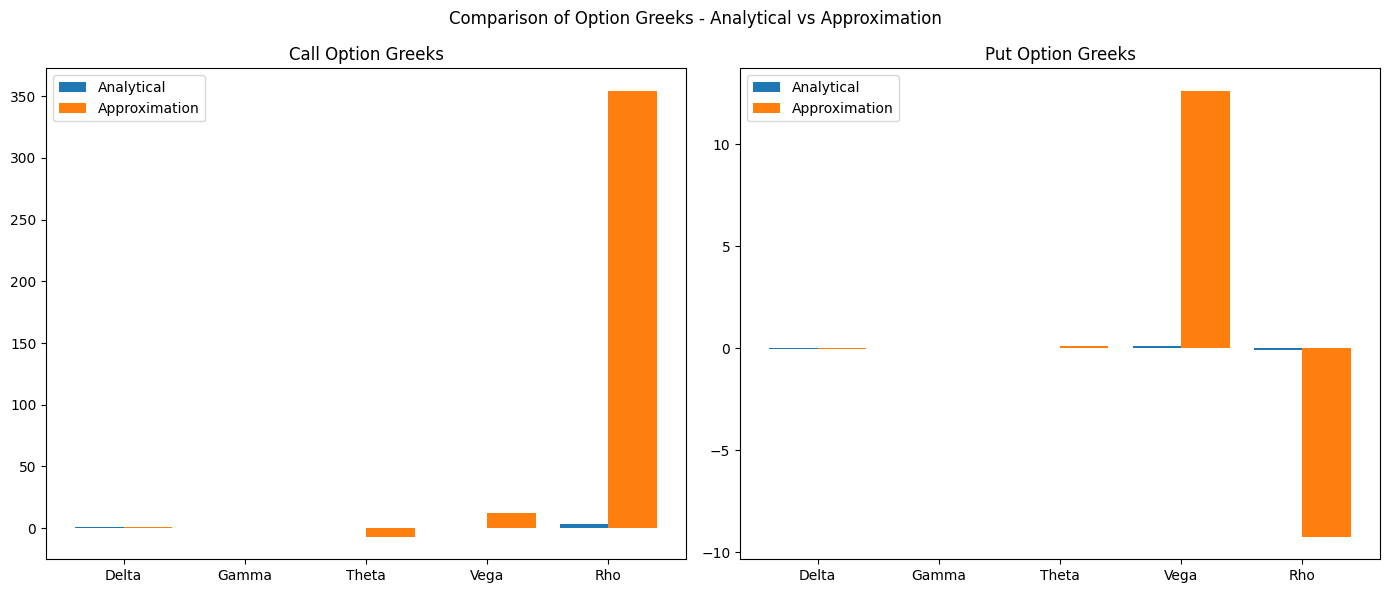

In [ ]:
import matplotlib.pyplot as plt

greeks_analytical = greeks
greeks_approximation = greeks_approx

greek_labels = ['Delta', 'Gamma', 'Theta', 'Vega', 'Rho']
call_greeks_analytical = [greeks_analytical[f'call_{g.lower()}'] for g in greek_labels]
call_greeks_approximation = [greeks_approximation[f'call_{g.lower()}'] for g in greek_labels]
put_greeks_analytical = [greeks_analytical[f'put_{g.lower()}'] for g in greek_labels]
put_greeks_approximation = [greeks_approximation[f'put_{g.lower()}'] for g in greek_labels]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Call Option Greeks Comparison
axes[0].bar(np.arange(len(greek_labels)) - 0.2, call_greeks_analytical, width=0.4, label='Analytical')
axes[0].bar(np.arange(len(greek_labels)) + 0.2, call_greeks_approximation, width=0.4, label='Approximation')
axes[0].set_title('Call Option Greeks')
axes[0].set_xticks(np.arange(len(greek_labels)))
axes[0].set_xticklabels(greek_labels)
axes[0].legend()

# Put Option Greeks Comparison
axes[1].bar(np.arange(len(greek_labels)) - 0.2, put_greeks_analytical, width=0.4, label='Analytical')
axes[1].bar(np.arange(len(greek_labels)) + 0.2, put_greeks_approximation, width=0.4, label='Approximation')
axes[1].set_title('Put Option Greeks')
axes[1].set_xticks(np.arange(len(greek_labels)))
axes[1].set_xticklabels(greek_labels)
axes[1].legend()

plt.suptitle('Comparison of Option Greeks - Analytical vs Approximation')
plt.tight_layout()
plt.show()

**Visualizing Error**

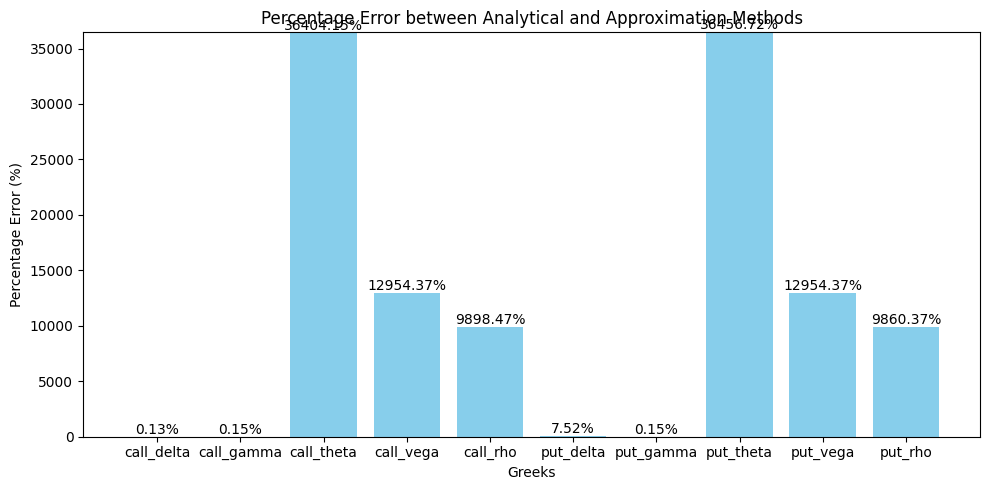

In [ ]:
def calculate_percentage_error(ana, approx):
    return abs((ana - approx) / ana) * 100 if ana != 0 else 0

percentage_errors = {greek: calculate_percentage_error(greeks_analytical[greek], greeks_approximation[greek])
                     for greek in greeks_analytical.keys()}

fig, ax = plt.subplots(figsize=(10, 5))

greek_names = list(percentage_errors.keys())
errors = [percentage_errors[greek] for greek in greek_names]

ax.bar(greek_names, errors, color='skyblue')

ax.set_xlabel('Greeks')
ax.set_ylabel('Percentage Error (%)')
ax.set_title('Percentage Error between Analytical and Approximation Methods')
ax.set_ylim(0, max(errors) + 5)

for i, v in enumerate(errors):
    ax.text(i, v + 0.5, f"{v:.2f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()